# Project Overview
-----

Zomato is an mobile and web app used by foodies to find good restaurants in a ever-growing number of cities around the world. Users of the app can find a restuarant by a multitide of filters and submit ratings, review and pictures of their experience at the establishment. 

The intention of this analysis is to use data provided by the Zomato API to understand trends among restaurants in Cape Town specifically. 

It is hoped that this analysis will allow hidden gems to be dsicovered through the use of aggregated data. In adddition, restaurateurs may use this info to understand, at least partially, the relationship between ratings, location, cuisine types and price points.

## Limitations of the Analysis

- It was intended to obtain a listing of all the reataurants in Cape Town, however the Zomato Search API limits you to 100 restaurants per search criteria. However with some trickery I was able to create two data sets - the top 100 restaurants by aggregated rating for each establishment type in Cape Town and the bottom 100 restaurants by aggregated rating for each establishment type in Cape Town. This means that although not every restaurant in Cape Town is included in the analysis, the bulk of the best and worst are, which should make the analysis insightful enough. 

- I was not able to access restaurant reviews, review counts, review sentiments, comments, pictures or picture counts from the API as one needs to be a Zomato Partner in order to do this. 

- Although rating's provided by restaurant patrons provide useful info about the combination of food, service and ambience as a whole, there is no way to extract specific details about each of these elements of the experience (at this time).

## Table of Contents

[Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)





# Data Cleaning and Preparation
----

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

In [2]:
top100 = pd.read_csv('Processed/zomato-cape-town-top100.csv')
bottom100 = pd.read_csv('Processed/zomato-cape-town-bottom100.csv')

## Data Cleaning Analysis

In [3]:
top100.head()

,name,cuisines,aggregate_rating,rating_text,votes,currency,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,is_delivering_now,has_table_booking
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,R,80,1,CBD,Cape Town,-33.924108,18.417317,0,0,0
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,R,40,1,Gardens,Cape Town,-33.928691,18.412097,0,0,0
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,R,165,2,CBD,Cape Town,-33.919300,18.421512,0,0,0
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,R,125,2,Sea Point,Cape Town,-33.921692,18.382759,0,0,0
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,R,110,2,Newlands,Cape Town,-33.970286,18.461950,0,0,0


In [4]:
top100.shape

(985, 15)

In [5]:
top100.dtypes

name                     object
cuisines                 object
aggregate_rating        float64
rating_text              object
votes                     int64
currency                 object
average_cost_for_two      int64
price_range               int64
locality                 object
city                     object
latitude                float64
longitude               float64
has_online_delivery       int64
is_delivering_now         int64
has_table_booking         int64
dtype: object

In [6]:
top100["cuisines"].value_counts()

Drinks Only                                                      98
Desserts                                                         47
Cafe, Bakery                                                     41
Cafe                                                             40
Desserts, Ice Cream                                              28
Finger Food                                                      21
European                                                         20
Bakery, Desserts                                                 19
African                                                          17
Pizza                                                            15
Cafe, Desserts                                                   14
Contemporary                                                     12
Cafe, Bakery, Desserts                                           11
Ice Cream, Desserts                                              11
Bakery                                          

In [7]:
top100["locality"].value_counts()

CBD                                           117
Stellenbosch                                   78
Gardens                                        44
Sea Point                                      36
Franschhoek                                    33
Green Point                                    32
Kenilworth                                     27
Durbanville                                    25
Somerset West                                  22
Claremont                                      20
Bellville                                      19
V & A Waterfront                               18
Victoria Wharf, V & A Waterfront               17
Woodstock                                      17
Table View                                     17
Constantia                                     16
Observatory                                    15
Canal Walk Mall, Century City                  15
Hermanus                                       14
Paarl                                          14


In [8]:
top100["currency"].value_counts()

R    985
Name: currency, dtype: int64

In [9]:
top100["has_online_delivery"].value_counts()

0    985
Name: has_online_delivery, dtype: int64

In [10]:
top100["is_delivering_now"].value_counts()

0    985
Name: is_delivering_now, dtype: int64

In [11]:
top100["has_table_booking"].value_counts()

0    982
1      3
Name: has_table_booking, dtype: int64

In [12]:
top100["price_range"].value_counts()

4    337
2    290
3    234
1    124
Name: price_range, dtype: int64

In [13]:
top100["rating_text"].value_counts()

Good         352
Average      303
Very Good    214
Not rated     89
Excellent     24
Poor           3
Name: rating_text, dtype: int64

In [14]:
top100.isnull().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
currency                0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
is_delivering_now       0
has_table_booking       0
dtype: int64

In [15]:
bottom100.head()

,name,cuisines,aggregate_rating,rating_text,votes,currency,average_cost_for_two,price_range,locality,city,latitude,longitude,has_online_delivery,is_delivering_now,has_table_booking
0,KFC,Desserts,2.4,Poor,6,R,80,1,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510500,0,0,0
1,Milky Lane,"Desserts, Ice Cream",2.6,Average,15,R,80,1,"Cavendish Square, Claremont",Cape Town,-33.980120,18.463156,0,0,0
2,Wakaberry,Desserts,2.6,Average,10,R,80,1,"Somerset Mall, Somerset West",Cape Town,-34.082219,18.823654,0,0,0
3,Marcel's Frozen Yoghurt,Desserts,2.6,Average,16,R,100,2,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,18.633909,0,0,0
4,Waffle Mania,Desserts,2.6,Average,5,R,120,2,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510667,0,0,0


In [16]:
bottom100.shape

(985, 15)

In [17]:
bottom100.dtypes

name                     object
cuisines                 object
aggregate_rating        float64
rating_text              object
votes                     int64
currency                 object
average_cost_for_two      int64
price_range               int64
locality                 object
city                     object
latitude                float64
longitude               float64
has_online_delivery       int64
is_delivering_now         int64
has_table_booking         int64
dtype: object

In [18]:
bottom100["cuisines"].value_counts()

Drinks Only                                                                  161
Cafe                                                                          72
Desserts                                                                      44
Fast Food                                                                     44
Cafe, Bakery                                                                  33
Desserts, Ice Cream                                                           28
Finger Food                                                                   23
Bakery, Desserts                                                              19
Pizza                                                                         18
Cafe, Bakery, Desserts                                                        16
European                                                                      12
African                                                                       12
Ice Cream, Desserts         

In [19]:
bottom100["locality"].value_counts()

CBD                                         77
Stellenbosch                                69
Franschhoek                                 35
Sea Point                                   35
Kenilworth                                  30
Hermanus                                    26
Bellville                                   25
Canal Walk Mall, Century City               25
Gardens                                     24
Durbanville                                 21
Green Point                                 20
V & A Waterfront                            20
Somerset West                               18
Observatory                                 18
Victoria Wharf, V & A Waterfront            17
Paarl                                       16
Table View                                  16
Grandwest Casino, Goodwood                  15
Woodstock                                   14
Cavendish Square, Claremont                 13
Rondebosch                                  13
Robertson    

In [20]:
bottom100["currency"].value_counts()

R    985
Name: currency, dtype: int64

In [21]:
bottom100["has_online_delivery"].value_counts()

0    985
Name: has_online_delivery, dtype: int64

In [22]:
bottom100["is_delivering_now"].value_counts()

0    985
Name: is_delivering_now, dtype: int64

In [23]:
bottom100["has_table_booking"].value_counts()

0    983
1      2
Name: has_table_booking, dtype: int64

In [24]:
bottom100["price_range"].value_counts()

2    350
4    261
3    225
1    149
Name: price_range, dtype: int64

In [25]:
bottom100["rating_text"].value_counts()

Average      659
Good         118
Poor          96
Not rated     93
Very Good     12
Excellent      7
Name: rating_text, dtype: int64

In [26]:
bottom100.isnull().sum()

name                    0
cuisines                0
aggregate_rating        0
rating_text             0
votes                   0
currency                0
average_cost_for_two    0
price_range             0
locality                0
city                    0
latitude                0
longitude               0
has_online_delivery     0
is_delivering_now       0
has_table_booking       0
dtype: int64

## Observations
- Multiple cuisine types can be specified per restaurant. These should be seperated thoughtfully so that filtering by single cuisine type will be possible. Dummy columns for each cuisine type will be created using True/False values for each. This adds a lot of columns to the data set but allows us to be more precise with filtering. It might also allow us to investigate whether having multiple cusine types on your Zomato listing contrinutes to your aggregate rating or some other measure. A column will be added to store the number of cuisine types on offer.
- Restarants that serve "Drinks Only" account for the highest number of establishments yet they may skew the data thus in certain instances, they will not be included in an investigation.
- "Locality" includes suburb names but also specific places of interest within certain suburbs, such as shopping malls. A new column will be created to maintain this extra info and the "Locality" column will be changed to show the suburb name only. This will allow us to filter on specific suburbs as a whole but also seperate out larger public spaces that have many restuarants such as the V&A Waterfront. 
- In addition to splitting suburb and places of interest, we may want to add a field showing the larger region that a suburb forms part of it. This will make aggregated and visualisation easier. 
- Restaurants that have a high or low aggregate rate based on a larger number of votes carry more useful info than restaurants whose aggregate rating comes from a few votes, hence a weighting factor column will be created so that restaurants with fewer votes will not be penalised unfairly. Restaurants that have received zero ratings will not be included in any ratings investigations however their locality, price range and average cost for two variables will be considered in other analysis. 
- Currency column contains "R" only, as expected, so can be removed from analysis. 
- "has_online_delivery" and "is_delivering_now" contains only 0, therefore they don't influence the analysis and will be removed. 
- "has_table_booking" is all 0's except for 3 restaurants in top 100 list and 2 in the bottom 100, therefore will be removed as well. 
- Rows from top and bottom data sets will be merged. This will lead to some duplicates which must be removed.
- There are no missing values in either data set

## Data Preparation

### Removing unneccessary columns from datasets

In [27]:
cols = ['name', 'cuisines', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'locality', 'city',
       'latitude', 'longitude']
top100 = top100[cols]
top100.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,80,1,CBD,Cape Town,-33.924108,18.417317
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,40,1,Gardens,Cape Town,-33.928691,18.412097
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,165,2,CBD,Cape Town,-33.919300,18.421512
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,18.382759
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,110,2,Newlands,Cape Town,-33.970286,18.461950


In [28]:
bottom100 = bottom100[cols]
bottom100.head()

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
0,KFC,Desserts,2.4,Poor,6,80,1,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510500
1,Milky Lane,"Desserts, Ice Cream",2.6,Average,15,80,1,"Cavendish Square, Claremont",Cape Town,-33.980120,18.463156
2,Wakaberry,Desserts,2.6,Average,10,80,1,"Somerset Mall, Somerset West",Cape Town,-34.082219,18.823654
3,Marcel's Frozen Yoghurt,Desserts,2.6,Average,16,100,2,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,18.633909
4,Waffle Mania,Desserts,2.6,Average,5,120,2,"Canal Walk Mall, Century City",Cape Town,-33.892667,18.510667


### Merge data sets and remove duplicates

In [29]:
data = pd.concat([top100, bottom100], axis=0)
data.shape

(1970, 11)

In [30]:
data[data.duplicated(subset=["name", "locality"])]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
87,N' Ice,"Ice Cream, Desserts",0.0,Not rated,1,70,1,Strand,Cape Town,-34.114265,18.822527
148,Vida E Caffe,"Cafe, Desserts",3.3,Average,17,150,2,Gardens,Cape Town,-33.929000,18.411833
160,Kauai,"Healthy Food, Fast Food",3.3,Average,11,200,3,CBD,Cape Town,-33.922833,18.420833
299,The Fat Cactus,"Mexican, Finger Food, Tex-Mex",4.1,Very Good,410,300,4,Gardens,Cape Town,-33.928833,18.410833
301,Rick's Cafe Americain,"Moroccan, Grill, Seafood, Burger, Finger Food",3.9,Good,267,320,4,Gardens,Cape Town,-33.928372,18.410481
302,Bombay Bicycle Club,"Mediterranean, Steak, Finger Food",3.9,Good,277,450,4,Gardens,Cape Town,-33.936626,18.404738
303,Beerhouse on Long,"Grill, German",3.9,Good,301,300,4,CBD,Cape Town,-33.925512,18.415936
500,Warwick Wine Estate,"South African, Mediterranean, Cafe",4.6,Excellent,104,440,4,Stellenbosch,Cape Town,-33.840835,18.864158
502,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,18.382759
504,The Velvet Cake Co.,"Cafe, Desserts, Bakery",4.4,Very Good,126,160,2,Bellville,Cape Town,-33.868301,18.641180


In [31]:
data.duplicated(subset=["name", "locality"]).sum()

611

In [32]:
# duplicates are considerd those restaurants with the same name in the same location. Keep the first instance.
data = data.drop_duplicates(subset=["name", "locality"], keep='first')
data.shape

(1359, 11)

In [33]:
data.duplicated(subset=["name", "locality"]).sum()

0

### Remove columns with no location coordinates

In [34]:
data[(data["longitude"] == 0) & (data["latitude"] == 0)]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,longitude
40,Jessy's Waffles,Desserts,3.1,Average,10,100,2,Gardens,Cape Town,0.0,0.0
91,DV Café,"Desserts, Cafe, Ice Cream",0.0,Not rated,0,50,1,"Spice Route Farm, Paarl",Cape Town,0.0,0.0
132,Lekker Vegan,Fast Food,3.4,Average,22,200,3,CBD,Cape Town,0.0,0.0
363,The Vic Bar,"American, Italian",3.0,Average,4,0,1,Gardens,Cape Town,0.0,0.0
774,La Bella Rosa Bistro & Coffee,"Cafe, Burger, Bakery",2.8,Average,4,160,2,Durbanville,Cape Town,0.0,0.0
826,The Common Room,Finger Food,0.0,Not rated,0,70,1,CBD,Cape Town,0.0,0.0
937,Jack Rabbit Mobile Kitchen,"Fast Food, Street Food, South African",0.0,Not rated,3,100,2,Durbanville,Cape Town,0.0,0.0
676,Company Social Brasserie,Contemporary,3.1,Average,8,0,1,Stellenbosch,Cape Town,0.0,0.0


In [35]:
data = data[(data["longitude"] != 0) & (data["latitude"] != 0)]
data.shape

(1351, 11)

### Create new columns from existing data

In [36]:
# Values in cuisine columns may have multiple values with ',' seperator
# Extract each possible cuisine type then ensures each dummy column is prefixed with "cuisine_"

dummies = data['cuisines'].str.get_dummies(sep=", ")
dummies.columns = ["cuisine_" + str(col) for col in dummies.columns]
data = pd.concat([data, dummies], axis=1)
data.sample(10)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
198,Snoekies,"Fast Food, Seafood",2.7,Average,8,140,2,"Tokai Junction, Tokai",Cape Town,-34.069833,...,0,0,0,0,0,0,0,0,0,0
149,Slice Pizza,Pizza,3.3,Average,18,190,2,CBD,Cape Town,-33.925882,...,0,0,0,0,0,0,0,0,0,0
249,Zenith Sky Bar,"Mediterranean, Sushi, Burger",2.5,Average,43,350,4,Green Point,Cape Town,-33.909046,...,0,0,1,0,0,0,0,0,0,0
232,Foliage Restaurant,"French, Contemporary",4.2,Very Good,58,400,4,Franschhoek,Cape Town,-33.912722,...,0,0,0,0,0,0,0,0,0,0
235,Panarottis,"Pizza, Italian",2.4,Poor,18,280,3,"Tygervalley Shopping Centre, Bellvile",Cape Town,-33.888199,...,0,0,0,0,0,0,0,0,0,0
332,JC Brasserie & Pub,"Continental, Burger, Tapas, Finger Food",3.3,Average,68,250,3,Zonnebloem,Cape Town,-33.931606,...,0,0,0,1,0,0,0,0,0,0
260,Tokyo,"Sushi, Chinese",2.5,Average,20,150,2,Brackenfell,Cape Town,-33.873805,...,0,0,1,0,0,0,0,0,0,0
897,Kanonkop Tasting Room,Drinks Only,3.2,Average,10,100,2,Stellenbosch,Cape Town,-33.852874,...,0,0,0,0,0,0,0,0,0,0
259,Schoongezicht Restaurant,Continental,2.5,Average,25,350,4,Brackenfell,Cape Town,-33.892694,...,0,0,0,0,0,0,0,0,0,0
595,Cafe Blanc de Noir,"European, Beverages, Cafe, Contemporary, Desse...",3.7,Good,77,300,4,Stellenbosch,Cape Town,-33.919000,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.shape

(1351, 83)

In [38]:
# Go through each row and extract a places from the locality if one is specified
# Store the place and locality seperately in order to filter more precisely

places = []
localities = []
def split_locality(row):
    items = row["locality"].split(',')
    if len(items) > 1:
        places.append(items[0])
        localities.append(items[1].strip())
    else:
        places.append("None")
        localities.append(items[0].strip())
        
       
data.apply(split_locality, axis=1)
data["places"] = places
data["locality"] = localities
data[["locality", "places"]].sample(10)

,locality,places
100,Claremont,Cavendish Square
685,Camps Bay,None
441,Franschhoek,None
583,De Waterkant,None
542,Woodstock,None
533,CBD,None
472,Observatory,None
256,CBD,None
534,Claremont,Cavendish Square
274,Tamboerskloof,None


### Fixing incorrect latitudes

In [39]:
data[data["latitude"] > 0]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places
658,The 41,"Contemporary, Seafood, Mediterranean, Sushi",3.5,Good,27,400,4,Camps Bay,Cape Town,33.948688,...,0,1,0,0,0,0,0,0,0,None
667,Pearl Mountain,Drinks Only,3.4,Average,7,50,1,Paarl,Cape Town,33.702186,...,0,0,0,0,0,0,0,0,0,Pearl Mountain Wine Estate
867,Groot Constantia Winery,Drinks Only,3.9,Good,52,90,1,Constantia,Cape Town,34.026732,...,0,0,0,0,0,0,0,0,0,Groot Constantia Wine Estate
682,Anura Tasting Room,Drinks Only,3.1,Average,5,100,2,Anura,Cape Town,33.804110,...,0,0,0,0,0,0,0,0,0,None
858,The Trading Post Eatery,"Cafe, Deli",3.0,Average,5,200,3,Anura,Cape Town,33.811946,...,0,0,0,0,0,0,0,0,0,None


In [40]:
f = lambda x: -x if x > 0 else x
data.latitude = data.latitude.apply(f)

In [41]:
data[data["latitude"] > 0]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places


### Fix localities incorrectly entered into Zomato
A number of localities were found with spelling mistakes leading to an incorrect representation of the data. While we could exclude these I would rather try fix them manually so as to keep as much data as possible for the analysis. 

In [42]:
mapping = {
    "Dubanville": "Durbanville",
    "Contantia": "Constantia",
    "Tableview": "Table View",
    "Belville":"Bellville",
    "Belvile":"Bellville",
    "Bellvile":"Bellville",
    "V&A Waterfront":"V & A Waterfront",
    "The Woodstock Exchange. Woodstock": "Woodstock",
    "Franschoek":"Franschhoek",
    "Somersetwest":"Somerset West",
    "Kuilsriver":"Kuils River",
    "Greenpoint":"Green Point",
    "Ridgeback Wine Farm": "Paarl",
    "Anura": "Stellenbosch",
    "Hannover": "Hanover Park",
    "NH The Lord Charles Hotel": "Somerset West",
    "Fairbridge Mall": "Brackenfell",
    "Blouberg": "Bloubergstrand",
    "Two Oceans Beach": "Mouille Point",
}

def correct_incorrect_localities(col):
    if col in mapping:
        return mapping.get(col, 'None')
    else:
        return col
    
#data["locality"] = data["locality"].apply(correct_incorrect_localities)

# If no mapping provided, return x
f = lambda x: mapping.get(x, x)
data.locality = data.locality.map(f)



In [43]:
data[data["locality"] == "Two Oceans Beach"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places


### Adding a region column to visualise larger geographical areas in the data
A scraper was built to obtain a list of Cape Town suburbs and their wider regions from https://en.wikipedia.org/wiki/List_of_Cape_Town_suburbs. The code is available on the projects Github page. First we will import the suburb data, then for each restaurant in our dataset, we will match its locality to this list of suburbs and assign the fitting region to a new column in the main dataset.

In [44]:
suburbs = pd.read_csv("Processed/cape-town-suburbs.csv")
suburbs.sample(10)

,locality,region
25,Kensington,Northern Suburbs
28,Loevenstein,Northern Suburbs
34,Plattekloof,Northern Suburbs
74,Wynberg,Southern Suburbs
9,Schotse Kloof,City Bowl
112,Pelican Park,Cape Flats
125,Montague Gardens,West Coast
59,Kreupelbosch,Southern Suburbs
49,Bishopscourt,Southern Suburbs
99,Gugulethu,Cape Flats


In [45]:
def match_locality(row):
    suburb = suburbs[suburbs['locality'] == row['locality']]
    if suburb.shape[0] == 1:
        return suburb.iloc[0]['region']
    else:
        return "None"

data["region"] = data.apply(match_locality, axis=1)
data.head(10)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
0,Moro Gelato,"Desserts, Ice Cream",4.8,Excellent,67,80,1,CBD,Cape Town,-33.924108,...,0,0,0,0,0,0,0,0,None,None
1,Unframed Ice Cream,Ice Cream,4.7,Excellent,102,40,1,Gardens,Cape Town,-33.928691,...,0,0,0,0,0,0,0,0,None,City Bowl
2,The Velvet Cake Co.,"Bakery, Desserts",4.6,Excellent,87,165,2,CBD,Cape Town,-33.919300,...,0,0,0,0,0,0,0,0,None,None
3,My Sugar,"Cafe, Patisserie, Bakery, Desserts",4.5,Excellent,195,125,2,Sea Point,Cape Town,-33.921692,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
4,The Creamery,"Desserts, Ice Cream",4.5,Excellent,388,110,2,Newlands,Cape Town,-33.970286,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
5,The Velvet Cake Co.,"Cafe, Desserts, Bakery",4.4,Very Good,126,160,2,Bellville,Cape Town,-33.868301,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
6,The Creamery,"Desserts, Ice Cream",4.2,Very Good,110,110,2,Green Point,Cape Town,-33.904093,...,0,0,0,0,0,0,0,0,None,Atlantic Seaboard
7,The Creamery,"Desserts, Ice Cream",4.1,Very Good,44,75,1,Claremont,Cape Town,-33.981278,...,0,0,0,0,0,0,0,0,None,Southern Suburbs
8,Myog,Desserts,4.1,Very Good,86,100,2,Gardens,Cape Town,-33.931500,...,0,0,0,0,0,0,0,0,None,City Bowl
9,Baskin Robbins,"Ice Cream, Desserts",3.9,Good,38,80,1,Century City,Cape Town,-33.893985,...,0,0,0,0,0,0,0,0,Canal Walk Mall,None


In [46]:
# We need to manually add suburbs that are part of the wider Cape Town region including Winelands etc.
# We could exclude these entries from the analysis but we'd then be excluding areas such as Stellenbosch and Franshoek which are know food mecca's in Cape Town.

mapping = {
    "CBD":"City Bowl",
    "Century City":"Northern Suburbs",
    "Paarl":"Winelands",
    "Stellenbosch":"Winelands",
    "V & A Waterfront":"Atlantic Seaboard",
    "Bay Area":"South Peninsula",
    "Franschhoek": "Winelands",
    "Riebeek Kasteel":"West Coast",
    "Gordons Bay":"Helderberg",
    "Hermanus":"Overberg",
    "Robertson":"Winelands",
    "Wellington":"Winelands",
    "Woodstock": "City Bowl",
    "Noordhoek":"South Peninsula",
    "Worcester":"Winelands",
    "Zonnebloem": "City Bowl",
    "Rylands":"Cape Flats",
    "Malmesbury": "West Coast",
    "Darling": "West Coast",
    "Sunningdale":"Northern Suburbs",
    "Cape Town International Airport":"Northern Suburbs",
    "Neelsie Student Centre": "Winelands",
    "Scarborough": "South Peninsula"
}


def map_locality_to_region(row):
    if row['region'] == 'None':
        return mapping.get(row['locality'], 'None')
    else:
        return row['region']
    

data["region"] = data.apply(map_locality_to_region, axis=1)
data[data["region"] == "None"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
465,Two Oceans Restaurant,Seafood,3.8,Good,53,570,4,Cape Point,Cape Town,-34.356368,...,0,0,0,0,0,0,0,0,None,None


In [47]:
data = data.drop(data.index[data["region"] == "None"].tolist())
data[data["region"] == "None"]

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region


In [48]:
data.sample(50)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region
230,OBI Restaurant,"Japanese, Sushi",4.2,Very Good,75,200,3,CBD,Cape Town,-33.919651,...,1,0,0,0,0,0,0,0,None,City Bowl
49,Wakaberry,Desserts,3.0,Average,5,80,1,Stellenbosch,Cape Town,-33.938048,...,0,0,0,0,0,0,0,0,None,Winelands
155,Debonairs Pizza,Pizza,2.6,Average,14,150,2,Sunningdale,Cape Town,-33.804977,...,0,0,0,0,0,0,0,0,Westcoast Village,Northern Suburbs
653,Carlyles on Derry,"Italian, Burger, Beverages, Finger Food, Grill...",3.5,Good,56,260,3,Vredehoek,Cape Town,-33.938215,...,0,1,0,0,0,0,0,0,None,City Bowl
440,Spier Hotel Restaurant,"Mediterranean, Contemporary",3.3,Average,24,535,4,Stellenbosch,Cape Town,-33.976000,...,0,0,0,0,0,0,0,0,Spier Wine Estate,Winelands
361,Long Street Cafe,"Finger Food, Burger, Grill, Mediterranean",3.0,Average,41,300,4,CBD,Cape Town,-33.926205,...,0,0,0,0,0,0,0,0,None,City Bowl
270,Mugg & Bean,Cafe,2.6,Average,80,350,4,Claremont,Cape Town,-33.980945,...,0,0,0,0,0,0,0,0,Cavendish Square,Southern Suburbs
403,Poplars Restaurant,"European, Contemporary",2.6,Average,116,560,4,Durbanville,Cape Town,-33.840880,...,0,0,0,0,0,0,0,0,None,Northern Suburbs
250,Thai Cafe,Thai,2.5,Average,38,200,3,Rondebosch,Cape Town,-33.959531,...,0,0,0,0,1,0,0,0,None,Southern Suburbs
663,Meerlust Estate,Drinks Only,3.0,Average,5,60,1,Stellenbosch,Cape Town,-34.017140,...,0,0,0,0,0,0,0,0,None,Winelands


### Adding a column to store the count of cuisines types offered

In [49]:
data.shape

(1350, 85)

In [50]:
def count_cuisines(row):
    count = len([col for col in data.columns if 'cuisine_' in col if row[col] == True])    
    return count

data["cuisine_count"] = data.apply(count_cuisines, axis=1)
data.sample(5)

,name,cuisines,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,locality,city,latitude,...,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese,places,region,cuisine_count
153,Ho Ho Take-Aways,Chinese,3.3,Average,30,100,2,Bellville,Cape Town,-33.861691,...,0,0,0,0,0,0,0,None,Northern Suburbs,1
31,Gelato Mania,"Desserts, Ice Cream",3.4,Average,20,100,2,Camps Bay,Cape Town,-33.952667,...,0,0,0,0,0,0,0,The Promenade,Atlantic Seaboard,2
590,Ecco Il Cafe,Cafe,2.9,Average,4,150,2,Foreshore,Cape Town,-33.917816,...,0,0,0,0,0,0,0,None,City Bowl,1
697,Uva Mira Tasting Room,Drinks Only,3.3,Average,9,80,1,Stellenbosch,Cape Town,-34.021061,...,0,0,0,0,0,0,0,None,Winelands,1
652,Cavalli Tasting Room,Drinks Only,3.5,Good,13,60,1,Somerset West,Cape Town,-34.057966,...,0,0,0,0,0,0,0,None,Helderberg,1


In [51]:
data[["cuisines", "cuisine_count"]].sample(10)

,cuisines,cuisine_count
336,British,1
355,"Burger, Finger Food, Grill, Pizza",4
807,Finger Food,1
633,Drinks Only,1
505,"Cafe, Continental",2
116,"Fast Food, Seafood",2
695,Drinks Only,1
373,Drinks Only,1
416,"Japanese, Seafood, Sushi",3
435,European,1


In [52]:
data.shape

(1350, 86)

### Reordering columns

In [53]:
col_order = ['name', 'aggregate_rating', 'rating_text', 'votes',
       'average_cost_for_two', 'price_range', 'cuisines', 'cuisine_count', 'places', 'locality', 'region', 'city', 'latitude',
       'longitude']
other_cols = [c for c in data.columns if c not in col_order]
data = data[col_order+other_cols]
data.sample(5)

,name,aggregate_rating,rating_text,votes,average_cost_for_two,price_range,cuisines,cuisine_count,places,locality,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
372,Pleasant Pheasant,2.8,Average,5,300,4,"Steak, Grill, Burger, Seafood",4,None,Riebeek Kasteel,...,1,0,0,0,0,0,0,0,0,0
693,Wine Tasting at Beau Constantia,3.3,Average,11,180,2,Drinks Only,1,Beau Constantia Wine Estate,Constantia,...,0,0,0,0,0,0,0,0,0,0
598,Cafe Chameleon,3.7,Good,73,300,4,"Cafe, South African, Burger, Pizza",4,Plattekloof Center,Plattekloof,...,0,0,0,0,0,0,0,0,0,0
242,Cafe Paradiso,4.1,Very Good,267,400,4,Italian,1,None,Gardens,...,0,0,0,0,0,0,0,0,0,0
192,Kfc,2.7,Average,7,150,2,Fast Food,1,None,Rondebosch,...,0,0,0,0,0,0,0,0,0,0


### Export new csv file post clean up

In [54]:
# Order data by rating desc and export to csv
data.sort_values("aggregate_rating", ascending=False, inplace=False).to_csv('Processed/zomato-cape-town-final.csv', 
                                                                            encoding='utf-8-sig', index=False)

# Exploratory Data Analysis
----

We will investigate the following questions:

- Understand average cost for two by suburb and cuisine type
- Understand aggregate rating by average cost for two, suburb and cuisine type
- Compare top 100 with bottom 100 across cost, suburb and cuisine types
- Hidden gem suburbs that have good ratings at lower cost > What can we learn about these places
- Worst and best rated restaurants > What can we learn about them
- Correlations between all columns, i.e does the number of cuisines offered influence the aggregate rating or cost?
- Overall suburb ratings using rating texts and aggregated ratinngs
- Do restaurants with higher price ranges get more votes?
- Summarise regions by avg price, rating, cuisines etc.
- Do cuisine types affect rating? Are there trends among top restaurants in the cuisines they serve? How about by locality/region?

In [55]:
main_cols = ["aggregate_rating", "votes", "average_cost_for_two", "price_range", "cuisine_count", "locality", "region", "places"]
cuisine_cols = []
for col in data.columns.tolist():
    if col.startswith('cuisine_') and col != 'cuisine_count':
        cuisine_cols.append(col)

First let's get an overall sense of the variable distributions and potential relationships between them, before diving deeper.

In [86]:
sns.set(style="white")


/Users/dorondusheiko/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


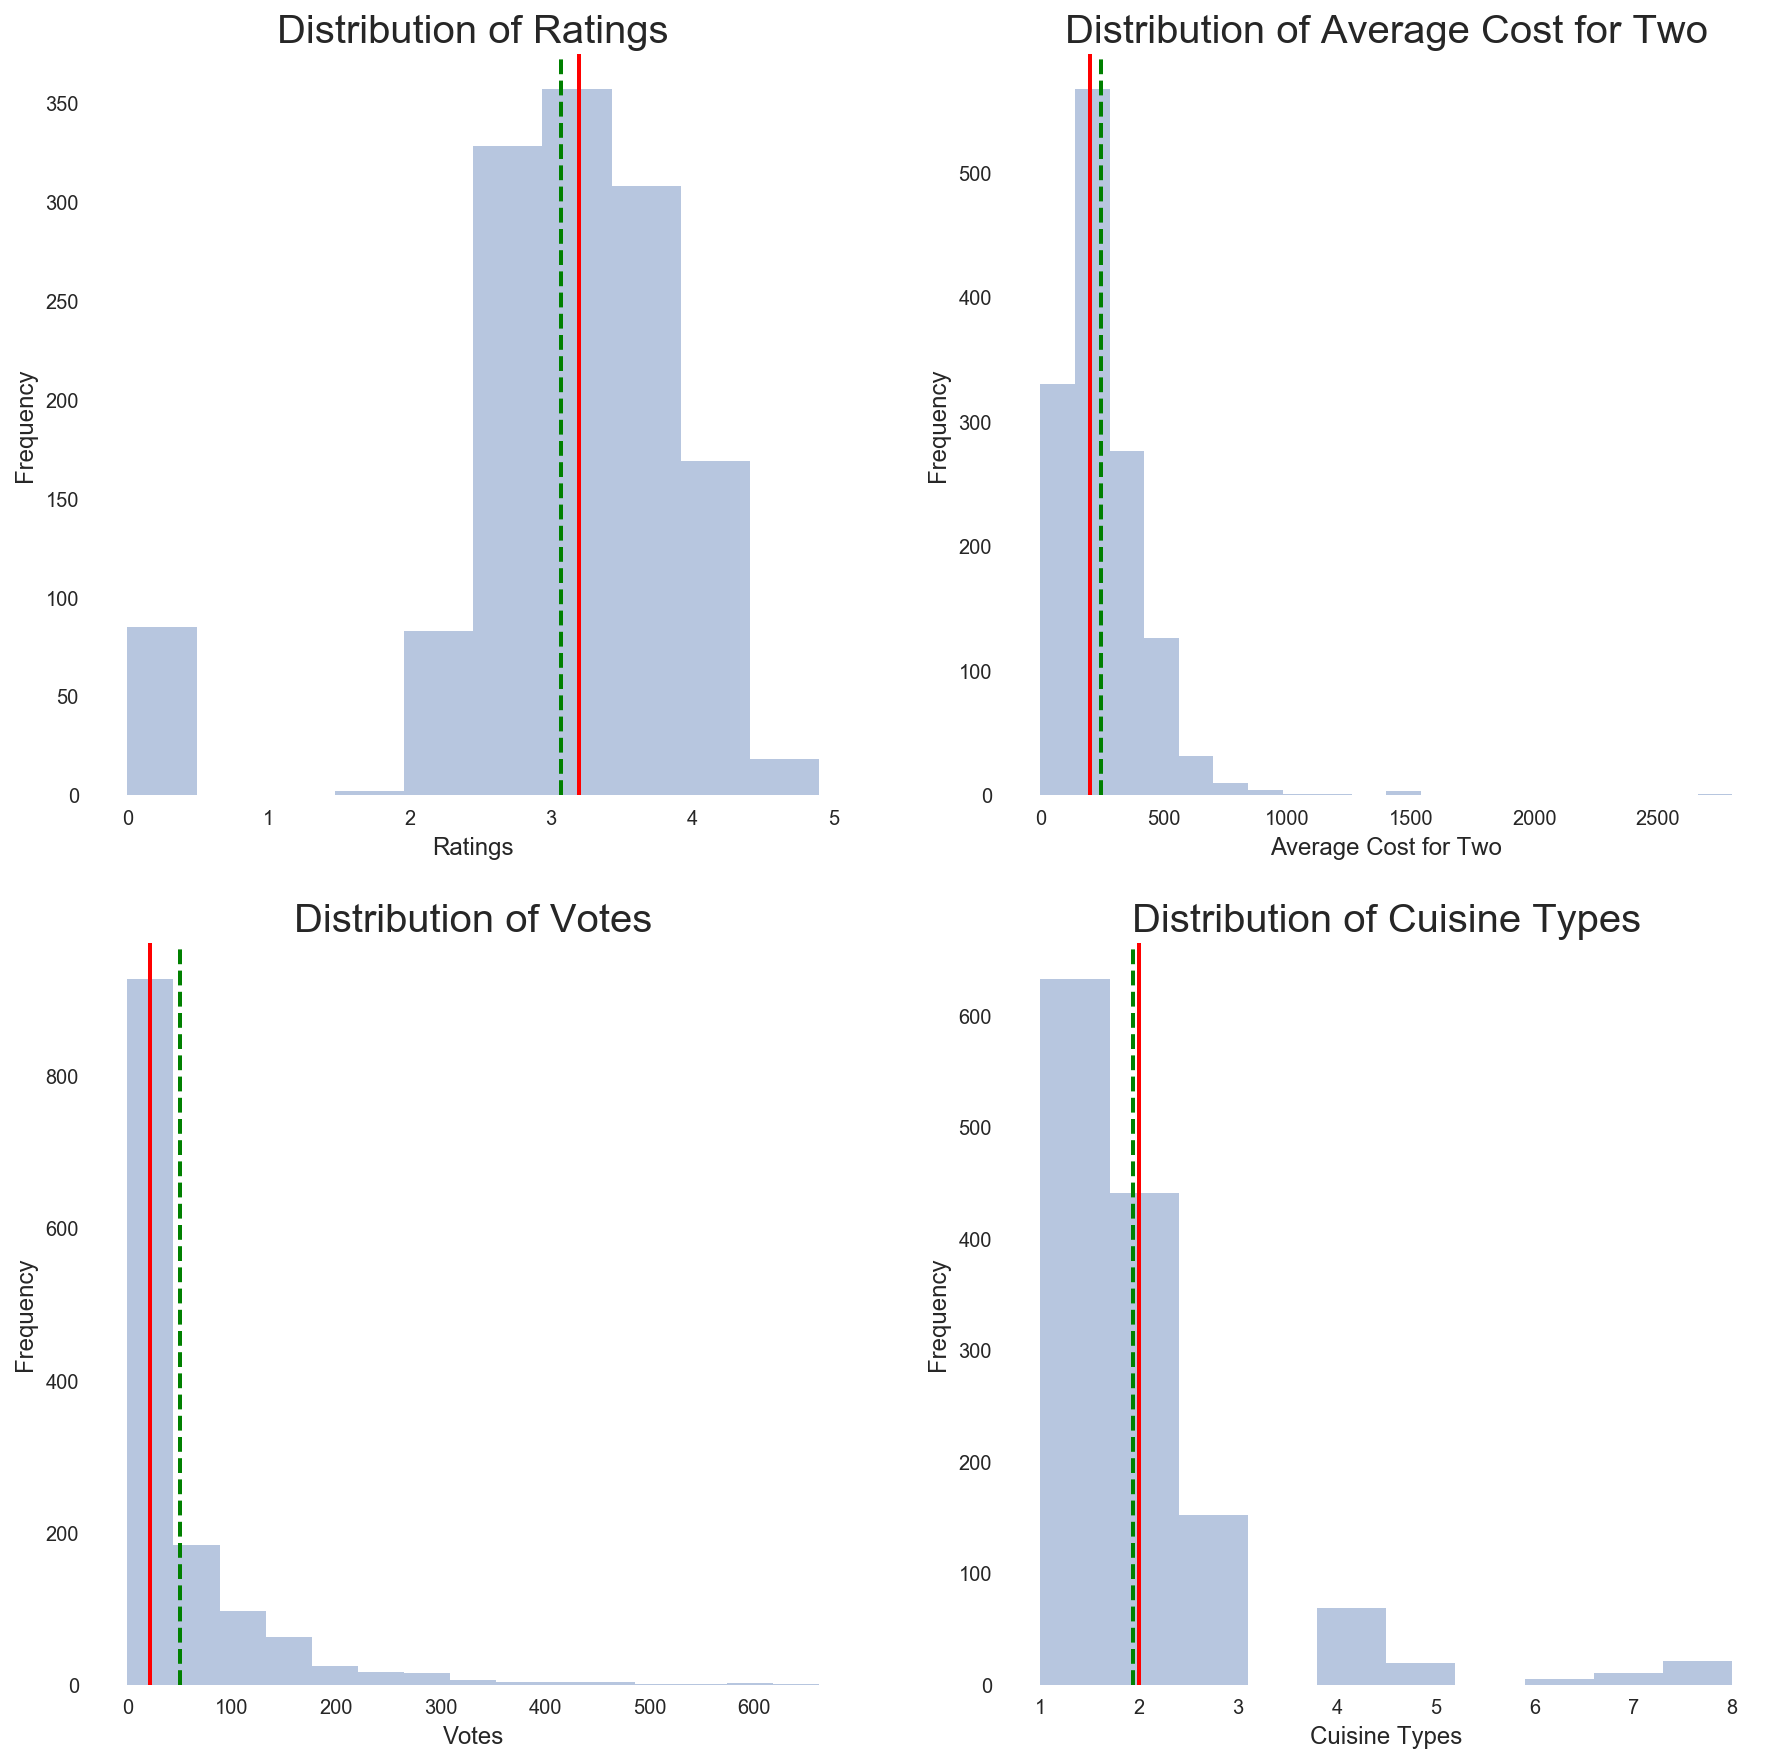

In [87]:
col = ["aggregate_rating", "average_cost_for_two", "votes", "cuisine_count"]
labels = ["Ratings", "Average Cost for Two", "Votes", "Cuisine Types"]
bins = [10, 20, 15, 10]

fig = plt.figure(figsize=(15, 15))
for r in range(0,len(col)):
    ax = fig.add_subplot(2, 2, r+1)
    #ax = data[col[r]].plot(kind='hist', alpha=0.8, bins=bins[r])
    ax = sns.distplot(data[col[r]], bins=bins[r], kde=False)
    ax.axvline(data[col[r]].mean(), color='g', linestyle='dashed', linewidth=2)
    ax.axvline(data[col[r]].median(), color='r', linestyle='solid', linewidth=2)
    ax.set_title("Distribution of " + labels[r], fontsize=20)
    ax.set_xlabel(labels[r], fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

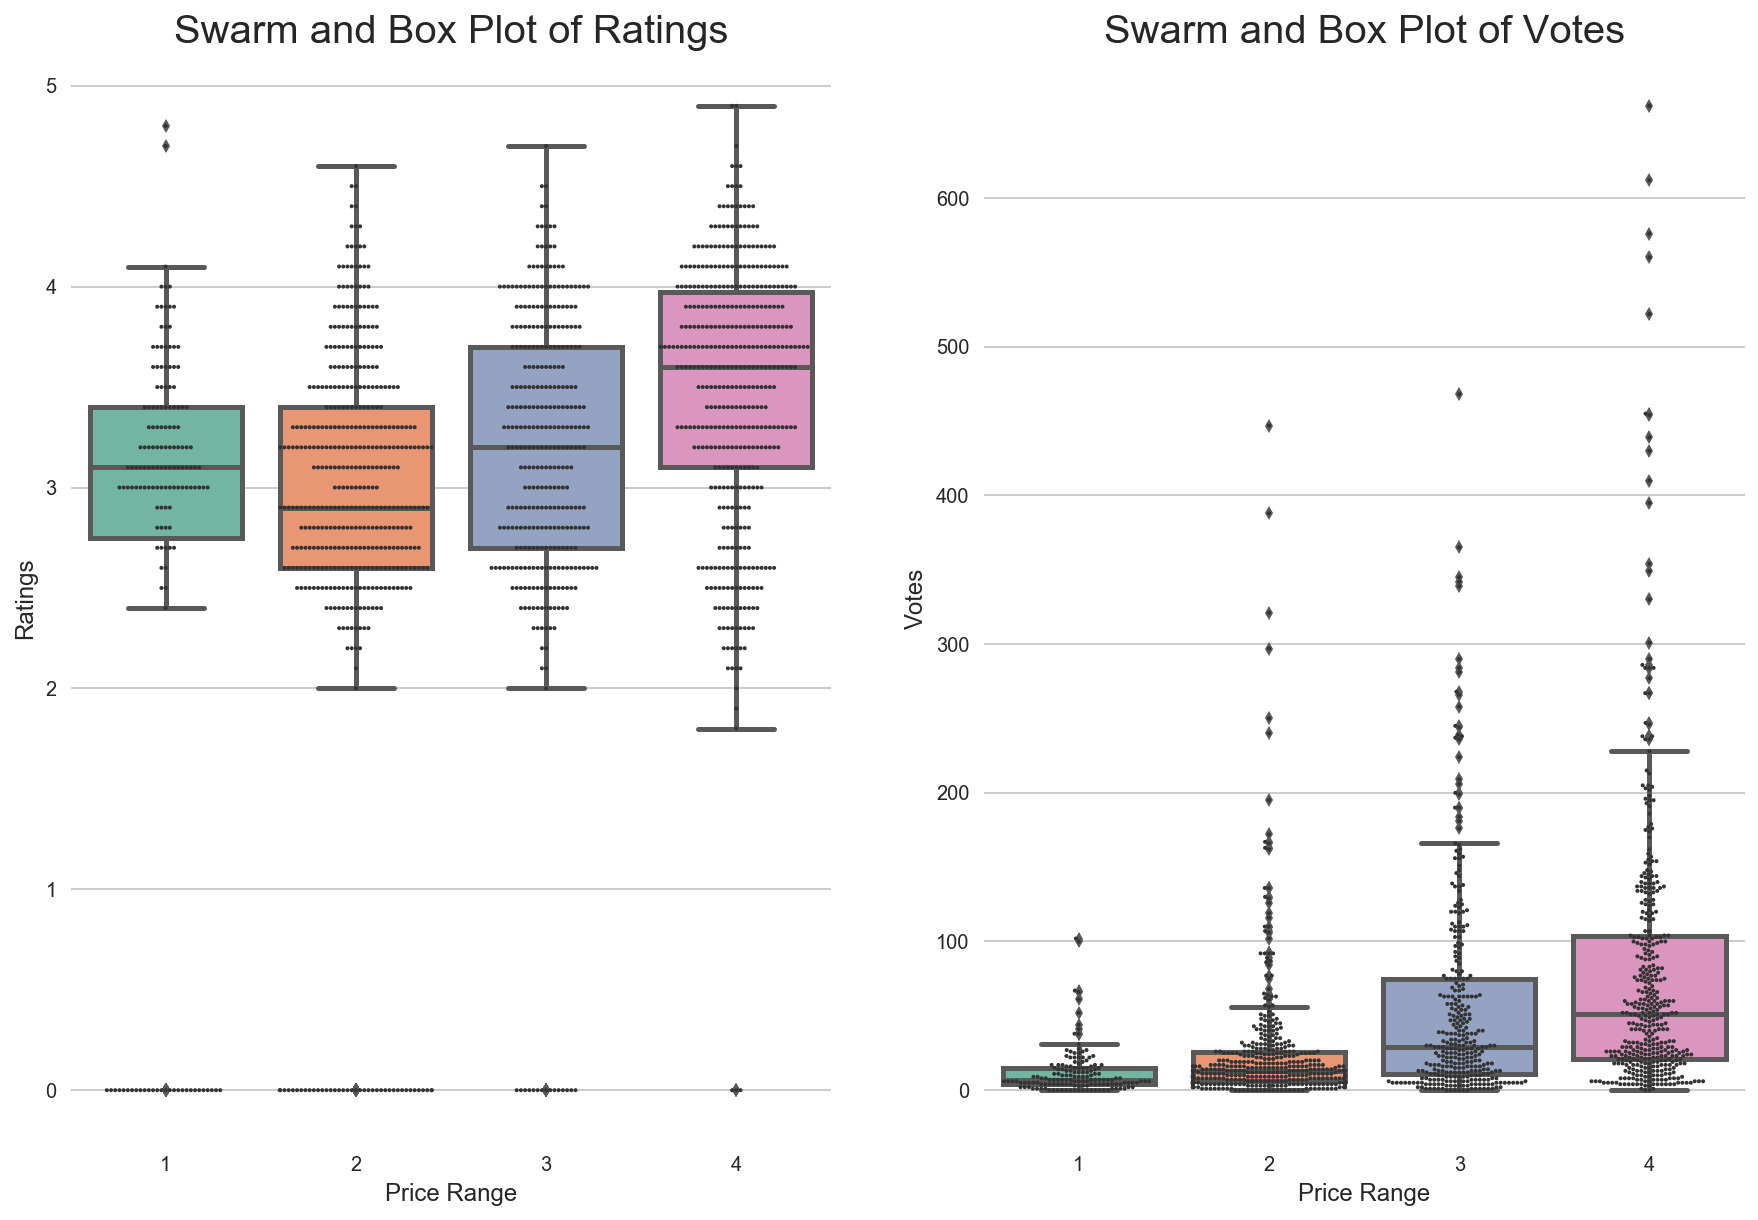

In [88]:
sns.set(style="whitegrid")
col = ["aggregate_rating", "votes"]
labels = ["Ratings", "Votes"]

fig = plt.figure(figsize=(15, 10))
for r in range(0,len(col)):
    ax = fig.add_subplot(1, 2, r+1)
    ax = sns.boxplot(x="price_range", y=col[r], data=data, whis=1.5, linewidth=2.5, palette="Set2")
    ax = sns.swarmplot(x="price_range", y=col[r], data=data, color="0.2", edgecolor="gray", size=2)
    ax.set_title("Swarm and Box Plot of " + labels[r], fontsize=20)
    ax.set_xlabel("Price Range", fontsize=12)
    ax.set_ylabel(labels[r], fontsize=12)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

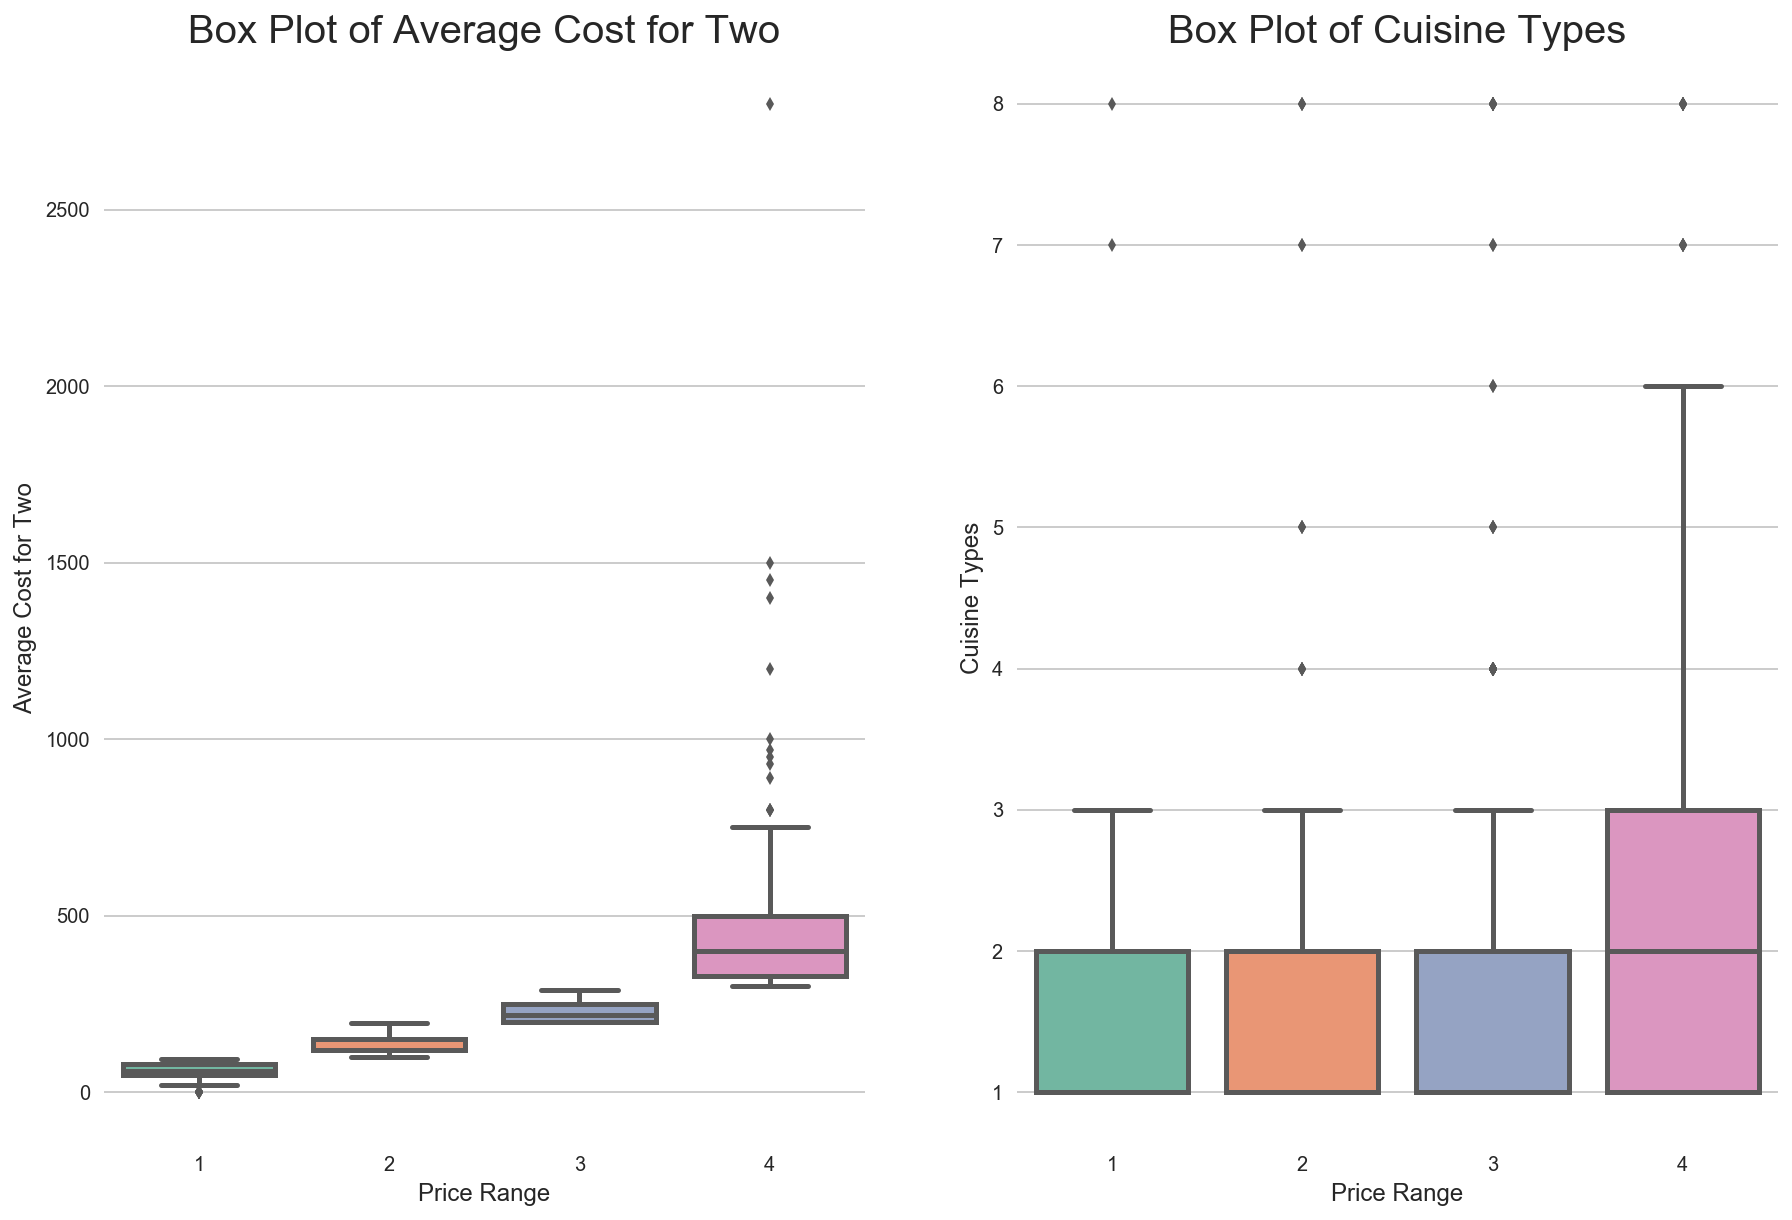

In [89]:
col = ["average_cost_for_two", "cuisine_count"]
labels = ["Average Cost for Two", "Cuisine Types"]

fig = plt.figure(figsize=(15, 10))
for r in range(0,len(col)):
    ax = fig.add_subplot(1, 2, r+1)
    ax = sns.boxplot(x="price_range", y=col[r], data=data, whis=1.5, linewidth=2.5, palette="Set2")
    ax.set_title("Box Plot of " + labels[r], fontsize=20)
    ax.set_xlabel("Price Range", fontsize=12)
    ax.set_ylabel(labels[r], fontsize=12)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

In [60]:
data["city"] = data["region"].isin(["City Bowl", "Atlantic Seaboard"])
data["winelands"] = data["region"].isin(["Winelands"])

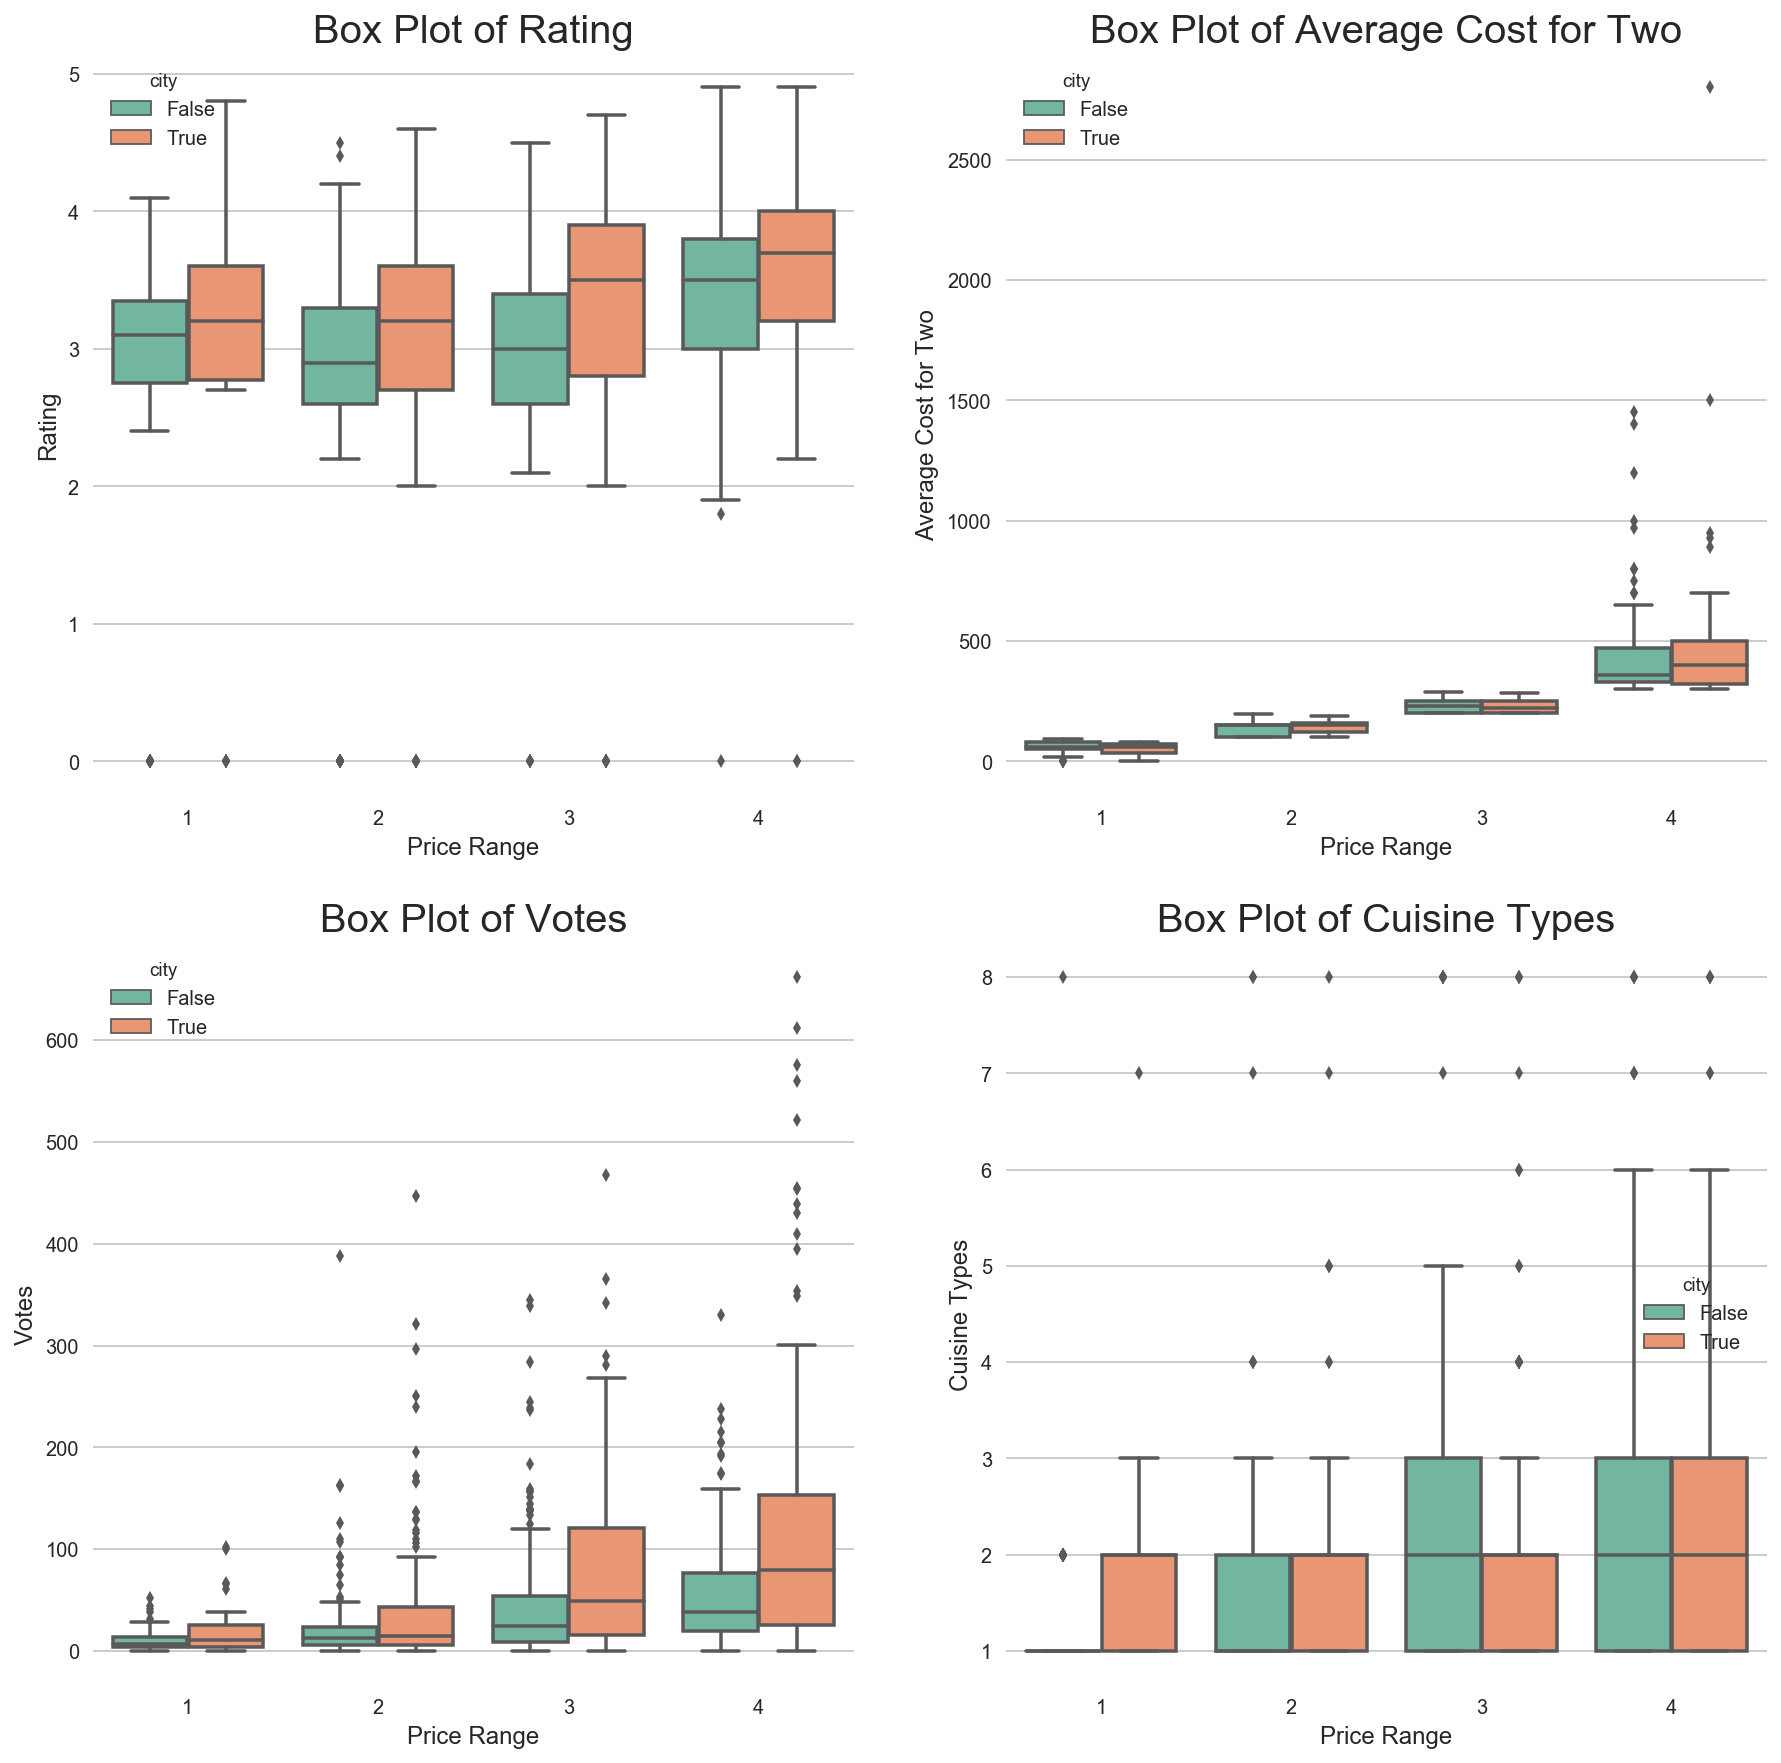

In [85]:
col = ["aggregate_rating", "average_cost_for_two", "votes", "cuisine_count"]
labels = ["Rating", "Average Cost for Two", "Votes", "Cuisine Types"]

fig = plt.figure(figsize=(15, 15))
for r in range(0,len(col)):
    ax = fig.add_subplot(2, 2, r+1)
    #ax = sns.boxplot(x="price_range", y=col[r], data=data, whis=1.5, linewidth=2.5, palette="Set2")
    ax = sns.boxplot(x="price_range", y=col[r], hue="city", data=data, dodge=True, whis=1.5, palette="Set2")
    ax.set_title("Box Plot of " + labels[r], fontsize=20)
    ax.set_xlabel("Price Range", fontsize=12)
    ax.set_ylabel(labels[r], fontsize=12)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

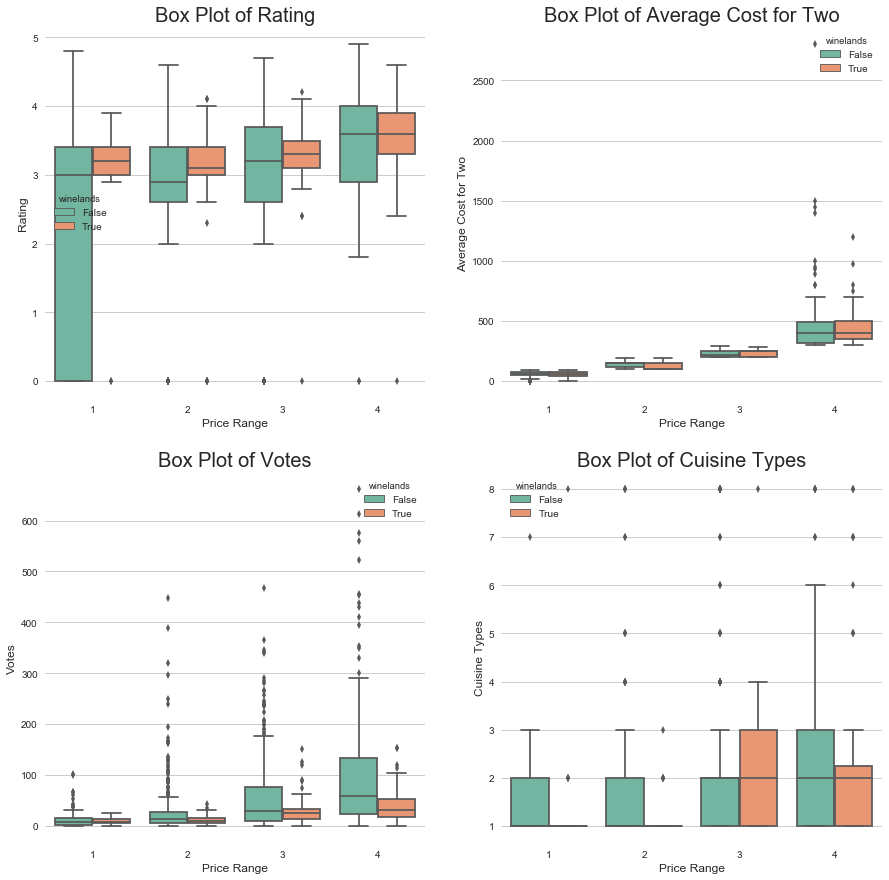

In [62]:
col = ["aggregate_rating", "average_cost_for_two", "votes", "cuisine_count"]
labels = ["Rating", "Average Cost for Two", "Votes", "Cuisine Types"]

fig = plt.figure(figsize=(15, 15))
for r in range(0,len(col)):
    ax = fig.add_subplot(2, 2, r+1)
    #ax = sns.boxplot(x="price_range", y=col[r], data=data, whis=1.5, linewidth=2.5, palette="Set2")
    ax = sns.boxplot(x="price_range", y=col[r], hue="winelands", data=data, dodge=True, whis=1.5, palette="Set2")
    ax.set_title("Box Plot of " + labels[r], fontsize=20)
    ax.set_xlabel("Price Range", fontsize=12)
    ax.set_ylabel(labels[r], fontsize=12)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

In [63]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n
    return x, y

In [64]:
price_range_data = {}
for key, val in data["price_range"].value_counts().items():
    price_range_data[key] = data[data["price_range"] == key]

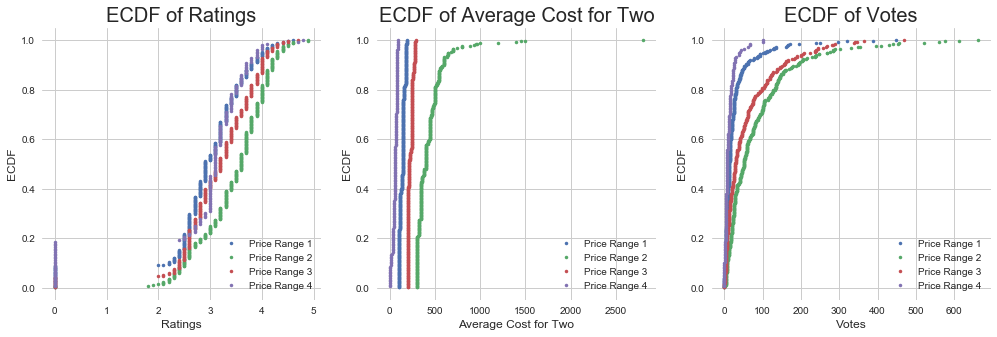

In [65]:
col = ["aggregate_rating", "average_cost_for_two", "votes"]
labels = ["Ratings", "Average Cost for Two", "Votes"]

fig = plt.figure(figsize=(17, 5))
for r in range(0,len(col)):
    ax = fig.add_subplot(1, 3, r+1)
    for key, val in price_range_data.items():
        x, y = ecdf(val[col[r]])
        plt.plot(x, y,marker=".", linestyle="none")
    #plt.margins(0.02)
    plt.legend(('Price Range 1', 'Price Range 2', 'Price Range 3', 'Price Range 4'), loc='lower right')
    plt.title("ECDF of " + labels[r], fontsize=20)
    plt.xlabel(labels[r], fontsize=12)
    plt.ylabel("ECDF", fontsize=12)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
plt.show()

## Visualising Ratings Geographically

In [66]:
locality_data = data.groupby("locality", as_index=False)['aggregate_rating', 'votes','average_cost_for_two', 'price_range', 'cuisine_count', 'latitude', 'longitude'].agg('mean')
locality_data.head()

,locality,aggregate_rating,votes,average_cost_for_two,price_range,cuisine_count,latitude,longitude
0,Athlone,2.350000,10.000000,149.125000,1.875000,1.625000,-33.963657,18.526069
1,Bay Area,3.771429,99.428571,260.714286,2.714286,2.285714,-34.128631,18.448696
2,Bellville,2.757143,28.265306,194.591837,2.510204,1.795918,-33.876798,18.638244
3,Bergvliet,2.066667,25.666667,156.666667,2.333333,4.000000,-34.050960,18.457438
4,Bloubergstrand,3.076923,59.615385,275.692308,3.230769,2.000000,-33.794740,18.460164


In [67]:
region_data = data.groupby("region", as_index=False)['aggregate_rating', 'votes','average_cost_for_two', 'price_range', 'cuisine_count', 'latitude', 'longitude'].agg('mean')
region_data.head()

,region,aggregate_rating,votes,average_cost_for_two,price_range,cuisine_count,latitude,longitude
0,Atlantic Seaboard,3.193488,78.506977,280.948837,2.911628,2.032558,-33.926486,18.401835
1,Cape Flats,2.415000,13.450000,154.650000,2.100000,1.950000,-33.972489,18.519635
2,City Bowl,3.283883,78.901099,259.820513,2.912088,2.047619,-33.925301,18.421267
3,Helderberg,2.881034,19.517241,234.982759,2.724138,1.965517,-34.094741,18.850283
4,Northern Suburbs,2.788442,30.140704,209.567839,2.608040,1.899497,-33.874830,18.602275


/Users/dorondusheiko/anaconda3/lib/python3.6/site-packages/numba/npyufunc/dufunc.py:88: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  super(DUFunc, self).__init__(dispatcher, **kws)
/Users/dorondusheiko/anaconda3/lib/python3.6/site-packages/numba/npyufunc/dufunc.py:88: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  super(DUFunc, self).__init__(dispatcher, **kws)
/Users/dorondusheiko/anaconda3/lib/python3.6/site-packages/numba/npyufunc/dufunc.py:88: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  super(DUFunc, self).__init__(dispatcher, **kws)
/Users/dorondusheiko/anaconda3/lib/python3.6/site-packages/numba/npyufunc/dufunc.py:88: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  super(DUFunc, self).__init__(dispatcher, **kws)
/Users/dorondush

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
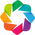

In [70]:
import xarray as xr
import pandas as pd
import geoviews as gv
import geoviews.tile_sources as gvts
import geoviews.feature as gf
#from bokeh.io import output_notebook
import bokeh.palettes
from bokeh.models import LinearColorMapper, BasicTicker, ColorBar
from bokeh.plotting import figure, output_file, show

from cartopy import crs as ccrs

gv.extension('bokeh')
#output_notebook()
#output_file("ct-restaurants.html")

In [71]:
import geoviews.tile_sources as gts

#gv.Layout([ts.relabel(name) for name, ts in gts.tile_sources.items()]).options(
#    'WMTS', xaxis=None, yaxis=None, width=225, height=225
#).cols(4)

### Restaurant Ratings by Price Range

In [72]:
ratings = gv.Dataset(data, kdims=['name', 'votes', 'price_range', 'average_cost_for_two'])

In [73]:
points = ratings.redim(aggregate_rating=dict(range=(0, 5))).to(gv.Points, ['longitude', 'latitude'], 
                    ['aggregate_rating', 'name', 'votes', 'cuisine_count', 'average_cost_for_two'])
(gts.Wikipedia * points.options(width=700, height=600, 
                                tools=['hover', 'save', 'zoom_in', 'zoom_out', 'pan' , 'wheel_zoom'],
                                colorbar=True, toolbar='above', xaxis=None, yaxis=None,
                                size_index=4, color_index=2, size=1, 
                                cmap=bokeh.palettes.all_palettes['Dark2'][5])).redim(longitude="Longitude",
                                                                                                latitude="Latitude",
                                                                                                aggregate_rating='Rating', 
                                                                                                name='Name',
                                                                                               votes="Votes",
                                                                                               price_range="Price Range",
                                                                                               average_cost_for_two="Avg. Cost for 2 (R)",
                                                                                               cuisine_count="No. Cuisines"
                                                                                            )

:HoloMap   [Price Range]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (Rating,Name,Votes,No. Cuisines,Avg. Cost for 2 (R))

### Suburb Ratings

In [74]:
locality_ratings = gv.Dataset(locality_data, kdims=['votes', 'price_range', 'average_cost_for_two', 'locality'])

In [75]:
points = locality_ratings.redim(aggregate_rating=dict(range=(0, 5))).to(gv.Points, ['longitude', 'latitude'], 
                    ['aggregate_rating', 'votes', 'cuisine_count', 'average_cost_for_two', 'price_range', 'locality'])
(gts.Wikipedia * points.options(width=700, height=600, 
                                tools=['hover', 'save', 'zoom_in', 'zoom_out', 'pan' , 'wheel_zoom'],
                                colorbar=True, toolbar='above', xaxis=None, yaxis=None,
                                size_index=3, color_index=2, size=3, cmap=bokeh.palettes.all_palettes['Dark2'][5])).redim(longitude="Longitude",
                                                                                                latitude="Latitude",
                                                                                                aggregate_rating='Rating', 
                                                                                                locality="Locality",
                                                                                               votes="Votes",
                                                                                               price_range="Price Range",
                                                                                               average_cost_for_two="Avg. Cost for 2 (R)",
                                                                                               cuisine_count="No. Cuisines"
                                                                                            )

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Rating,Votes,No. Cuisines,Avg. Cost for 2 (R),Price Range,Locality)

### Region Ratings

In [76]:
region_ratings = gv.Dataset(region_data, kdims=['votes', 'price_range', 'average_cost_for_two', 'region'])

In [77]:
points = region_ratings.redim(aggregate_rating=dict(range=(0, 5))).to(gv.Points, ['longitude', 'latitude'], 
                    ['aggregate_rating', 'votes', 'cuisine_count', 'average_cost_for_two', 'price_range', 'region'])
(gts.Wikipedia * points.options(width=700, height=600, 
                                tools=['hover', 'save', 'zoom_in', 'zoom_out', 'pan' , 'wheel_zoom'],
                                colorbar=True, toolbar='above', xaxis=None, yaxis=None,
                                size_index=3, color_index=2, size=4, cmap=bokeh.palettes.all_palettes['Dark2'][5])).redim(longitude="Longitude",
                                                                                                latitude="Latitude",
                                                                                                aggregate_rating='Rating', 
                                                                                                region="Region",
                                                                                               votes="Votes",
                                                                                               price_range="Price Range",
                                                                                               average_cost_for_two="Avg. Cost for 2 (R)",
                                                                                               cuisine_count="No. Cuisines"
                                                                                            )

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Rating,Votes,No. Cuisines,Avg. Cost for 2 (R),Price Range,Region)

### Exploring locality trends by cuisine type

In [78]:


table = data.pivot_table(['aggregate_rating'], 
                 index=['locality'], 
                 columns='cuisine_count', 
                 aggfunc={'aggregate_rating':'mean'},
                 margins=True)
table


aggregate_rating                      \
cuisine_count                                  1         2         3   
locality                                                               
Athlone                                 2.700000  1.766667  2.700000   
Bay Area                                3.700000  3.866667  3.700000   
Bellville                               2.543478  2.981250  3.012500   
Bergvliet                                    NaN  1.200000       NaN   
Bloubergstrand                          3.066667  3.225000  2.400000   
Brackenfell                             1.587500  2.720000  2.700000   
CBD                                     3.205333  3.339474  3.450000   
Camps Bay                               3.000000  3.541667  3.400000   
Cape Town International Airport         2.050000  2.600000       NaN   
Century City                            2.960000  2.900000  3.075000   
Claremont                               3.238095  2.887500  3.033333   
Constantia                              3.321429  4.023077  4.200000   
Crawford                                2.500000  1.975000       NaN   
Darling                                 1.550000       NaN       NaN   
De Waterkant                            3.485714  2.866667       NaN   
Diep River                              2.800000  2.575000  3.600000   
Durbanville                             3.076190  3.145455  3.366667   
Fish Hoek                               2.260000       NaN  2.400000   
Foreshore                               2.600000  2.685714  3.266667   
Franschhoek                             3.325000  3.488235       NaN   
Gardens                                 3.655556  3.650000  3.816667   
Goodwood                                2.354545  2.457143  2.333333   
Gordon's Bay                            0.000000       NaN       NaN   
Gordons Bay                             3.500000  3.200000  2.850000   
Green Point                             3.413333  3.452941  3.383333   
Hanover Park                            2.600000       NaN       NaN   
Hermanus                                2.883333  2.288889  3.200000   
Hout Bay                                2.466667  3.150000  3.633333   
Kenilworth                              1.580952  2.400000  1.750000   
Kraaifontein                                 NaN       NaN  2.700000   
...                                          ...       ...       ...   
Observatory                             2.900000  3.366667  2.716667   
Ottery                                       NaN       NaN  2.900000   
Paarl                                   3.285714  3.350000  3.566667   
Parklands                               2.585714  3.900000       NaN   
Parow                                   2.600000  3.100000       NaN   
Pinelands                               2.950000  3.650000  3.200000   
Plattekloof                             2.933333  3.433333  2.600000   
Plumstead                               2.975000  2.420000  2.500000   
Riebeek Kasteel                              NaN       NaN  3.050000   
Robertson                               3.125000  3.000000  3.300000   
Rondebosch                              2.754545  2.560000  2.450000   
Rylands                                 2.800000  2.600000       NaN   
Scarborough                             2.500000       NaN       NaN   
Sea Point                               2.848000  3.168000  3.200000   
Simon's Town                            2.150000       NaN  2.350000   
Somerset West                           3.263158  2.733333  2.466667   
Stellenbosch                            3.148611  3.496552  3.617647   
Strand                                  2.466667  3.166667       NaN   
Sunningdale                             2.625000       NaN  2.600000   
Table View                              2.700000  3.041667  0.000000   
Tamboerskloof                           3.500000       NaN  3.500000   
Tokai                                   2.475000  2.900000  2.500000   


In [79]:
grouped = data.groupby(['locality'], as_index=False)
rating_functions = ['mean']
cuisine_functions = ['sum']

fields = {}
fields['aggregate_rating'] = rating_functions
fields['votes'] = 'mean'
fields['price_range'] = 'mean'
fields['average_cost_for_two'] = 'mean'
fields['cuisine_count'] = 'mean'
fields['latitude'] = 'mean'
fields['longitude'] = 'mean'

for c in data.columns:
    if c.startswith('cuisine_') and c != 'cuisine_count':
        fields[c] = cuisine_functions

cuisines_by_locality = grouped.agg(fields)
cuisines_by_locality

,locality,aggregate_rating,votes,price_range,average_cost_for_two,cuisine_count,latitude,longitude,cuisine_African,cuisine_American,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
,,mean,mean,mean,mean,mean,mean,mean,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,Athlone,2.350000,10.000000,1.875000,149.125000,1.625000,-33.963657,18.526069,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Bay Area,3.771429,99.428571,2.714286,260.714286,2.285714,-34.128631,18.448696,0,0,...,0,0,2,0,0,0,0,0,0,0
2,Bellville,2.757143,28.265306,2.510204,194.591837,1.795918,-33.876798,18.638244,0,2,...,1,0,4,1,0,0,0,0,0,0
3,Bergvliet,2.066667,25.666667,2.333333,156.666667,4.000000,-34.050960,18.457438,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bloubergstrand,3.076923,59.615385,3.230769,275.692308,2.000000,-33.794740,18.460164,1,0,...,1,0,2,0,0,0,0,0,0,0
5,Brackenfell,2.268421,12.631579,2.684211,202.105263,2.210526,-33.864797,18.693704,2,0,...,0,0,2,0,0,0,0,0,0,0
6,CBD,3.280851,79.248227,2.936170,248.773050,1.900709,-33.923873,18.418290,3,1,...,5,3,6,4,0,0,1,0,0,1
7,Camps Bay,3.471429,61.380952,3.476190,425.476190,2.333333,-33.956492,18.375314,2,2,...,0,0,4,1,0,0,1,0,0,0
8,Cape Town International Airport,2.416667,23.666667,3.000000,265.500000,2.833333,-33.969821,18.597358,0,0,...,0,0,1,1,0,0,0,0,0,0


In [80]:
cuisine_cols = []
cuisine_cols.append("locality")
cuisine_cols.append("aggregate_rating")
for col in data.columns.tolist():
    if col.startswith('cuisine_') and col != 'cuisine_count':
        cuisine_cols.append(col)

In [81]:
cuisines_by_locality[cuisine_cols]

,locality,aggregate_rating,cuisine_African,cuisine_American,cuisine_Asian,cuisine_BBQ,cuisine_Bakery,cuisine_Bar Food,cuisine_Belgian,cuisine_Beverages,...,cuisine_Steak,cuisine_Street Food,cuisine_Sushi,cuisine_Tapas,cuisine_Tea,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese
,,mean,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,Athlone,2.350000,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Bay Area,3.771429,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,Bellville,2.757143,0,2,1,0,6,0,0,1,...,1,0,4,1,0,0,0,0,0,0
3,Bergvliet,2.066667,0,0,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Bloubergstrand,3.076923,1,0,0,0,1,0,0,0,...,1,0,2,0,0,0,0,0,0,0
5,Brackenfell,2.268421,2,0,1,0,3,0,0,1,...,0,0,2,0,0,0,0,0,0,0
6,CBD,3.280851,3,1,3,0,9,0,0,6,...,5,3,6,4,0,0,1,0,0,1
7,Camps Bay,3.471429,2,2,0,0,0,0,0,0,...,0,0,4,1,0,0,1,0,0,0
8,Cape Town International Airport,2.416667,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
